<a href="https://colab.research.google.com/github/irwanmaulana42/google-collab/blob/master/Batch%20Normalization%20with%20MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Memuat dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Pra-pemrosesan data
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28*28).astype('float32') / 255.0

In [6]:
# Membuat model dengan Batch Normalization
model = tf.keras.Sequential()
model.add(layers.Dense(64, input_shape=(28*28,)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(64))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(10, activation='softmax'))

# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Melatih model
history = model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 12s 5ms/step - loss: 0.2783 - accuracy: 0.9206
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1338 - accuracy: 0.9592
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1018 - accuracy: 0.9684
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0864 - accuracy: 0.9726
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0747 - accuracy: 0.9759
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0658 - accuracy: 0.9791
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0588 - accuracy: 0.9805
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0543 - accuracy: 0.9822
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0533 - accuracy: 0.9820
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0763

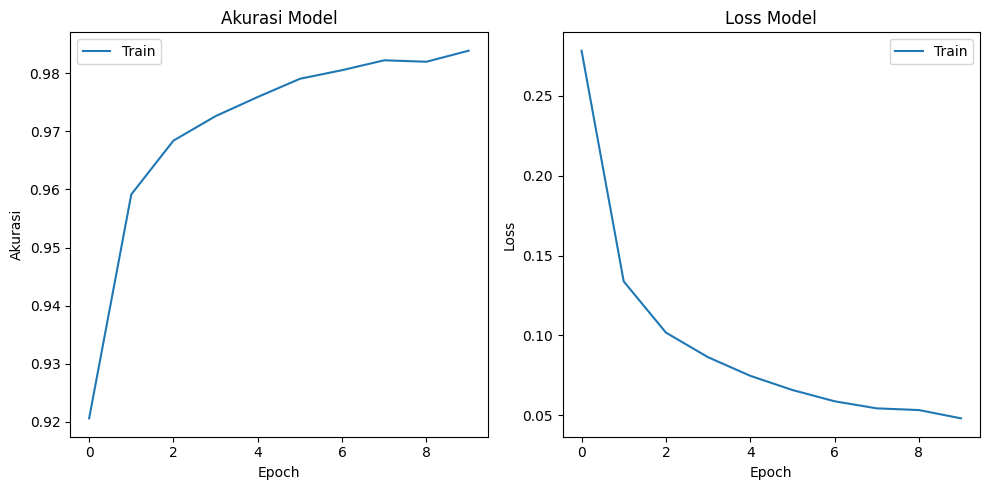

In [7]:
# Menampilkan grafik pelatihan
plt.figure(figsize=(10, 5))

# Grafik akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend(['Train'], loc='upper left')

# Grafik loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train'], loc='upper right')

# Menampilkan grafik
plt.tight_layout()
plt.show()


In [8]:
# Evaluasi model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0763 - accuracy: 0.9783
Test Loss: 0.07630570977926254
Test Accuracy: 0.9782999753952026


In [10]:
# Melakukan prediksi pada data pengujian
predictions = model.predict(x_test)

# Mengubah prediksi menjadi label
predicted_labels = np.argmax(predictions, axis=1)

# Menampilkan hasil prediksi
for i in range(10):
    print(f"Data ke-{i+1}: Prediksi = {predicted_labels[i]}, Label Asli = {y_test[i]}")


313/313 [==============================] - 1s 2ms/step
Data ke-1: Prediksi = 7, Label Asli = 7
Data ke-2: Prediksi = 2, Label Asli = 2
Data ke-3: Prediksi = 1, Label Asli = 1
Data ke-4: Prediksi = 0, Label Asli = 0
Data ke-5: Prediksi = 4, Label Asli = 4
Data ke-6: Prediksi = 1, Label Asli = 1
Data ke-7: Prediksi = 4, Label Asli = 4
Data ke-8: Prediksi = 9, Label Asli = 9
Data ke-9: Prediksi = 5, Label Asli = 5
Data ke-10: Prediksi = 9, Label Asli = 9
